# KNN = k Nearest Neighbor = K-近鄰演算法

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 載入資料(鳶尾花數據集)
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 顯示[熱圖](https://zh.wikipedia.org/wiki/%E7%86%B1%E5%9C%96)

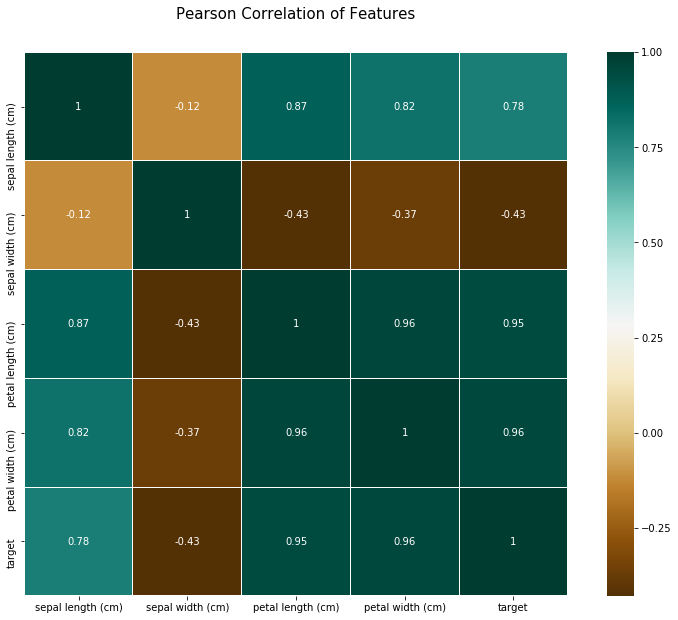

In [4]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), 
            cmap = "BrBG",
            linewidths=0.1, 
            square=True, 
            linecolor='white',
            annot=True)

In [5]:
# 資料切割
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(iris['data'],iris['target'],test_size=0.1)

## k值的選取規則:
1. 通常我們在選 k 值的時候，是用經驗法則在選擇
2. 通常規則，不要選太少 (小於 3)，因為你選不夠多人，就無法達到多數決的效果
3. 不要選太多 (大於 20)，因為這樣選出來的範圍太大，沒有找鄰居的效果！

In [6]:
 from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=8) # 使用 KNN 模型
clf = clf.fit(data_train, target_train) # 開始訓練

In [7]:
# 進行預測
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測:", predict)
print("正確標籤:", target_test)
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [0 1 1 1 0 1 1 0 2 1 0 1 0 0 1]
正確標籤: [0 1 1 1 0 1 1 0 2 1 0 1 0 0 1]
正確率:  100.0 %


## [混淆矩陣](https://kknews.cc/zh-tw/code/x39qpr9.html)

In [8]:
# 確認混淆矩陣
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,6,0,0
1,0,8,0
2,0,0,1


## 缺點
1. 解釋性非常差
2. 如果你的標籤數量本來就不平均，則難以分類
3. 並沒有考慮整體資料，只考慮的附近的資料